<a href="https://colab.research.google.com/github/jncln/CCADMACL_MIDTERMS_COM222ML/blob/main/Midterm_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CCADMACL (Midterm Exam)

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

## Load the datasets

In [5]:
face_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/face.csv?raw=true")
chrome_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/chrome.csv?raw=true")
lines2_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/lines2.csv?raw=true")
supernova_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/supernova.csv?raw=true")
network_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/network.csv?raw=true")
spirals_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/spirals.csv?raw=true")
densedisk_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/densedisk.csv?raw=true")
rings_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/rings.csv?raw=true")
chainlink_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/chainlink.csv?raw=true")

## Plot the datasets

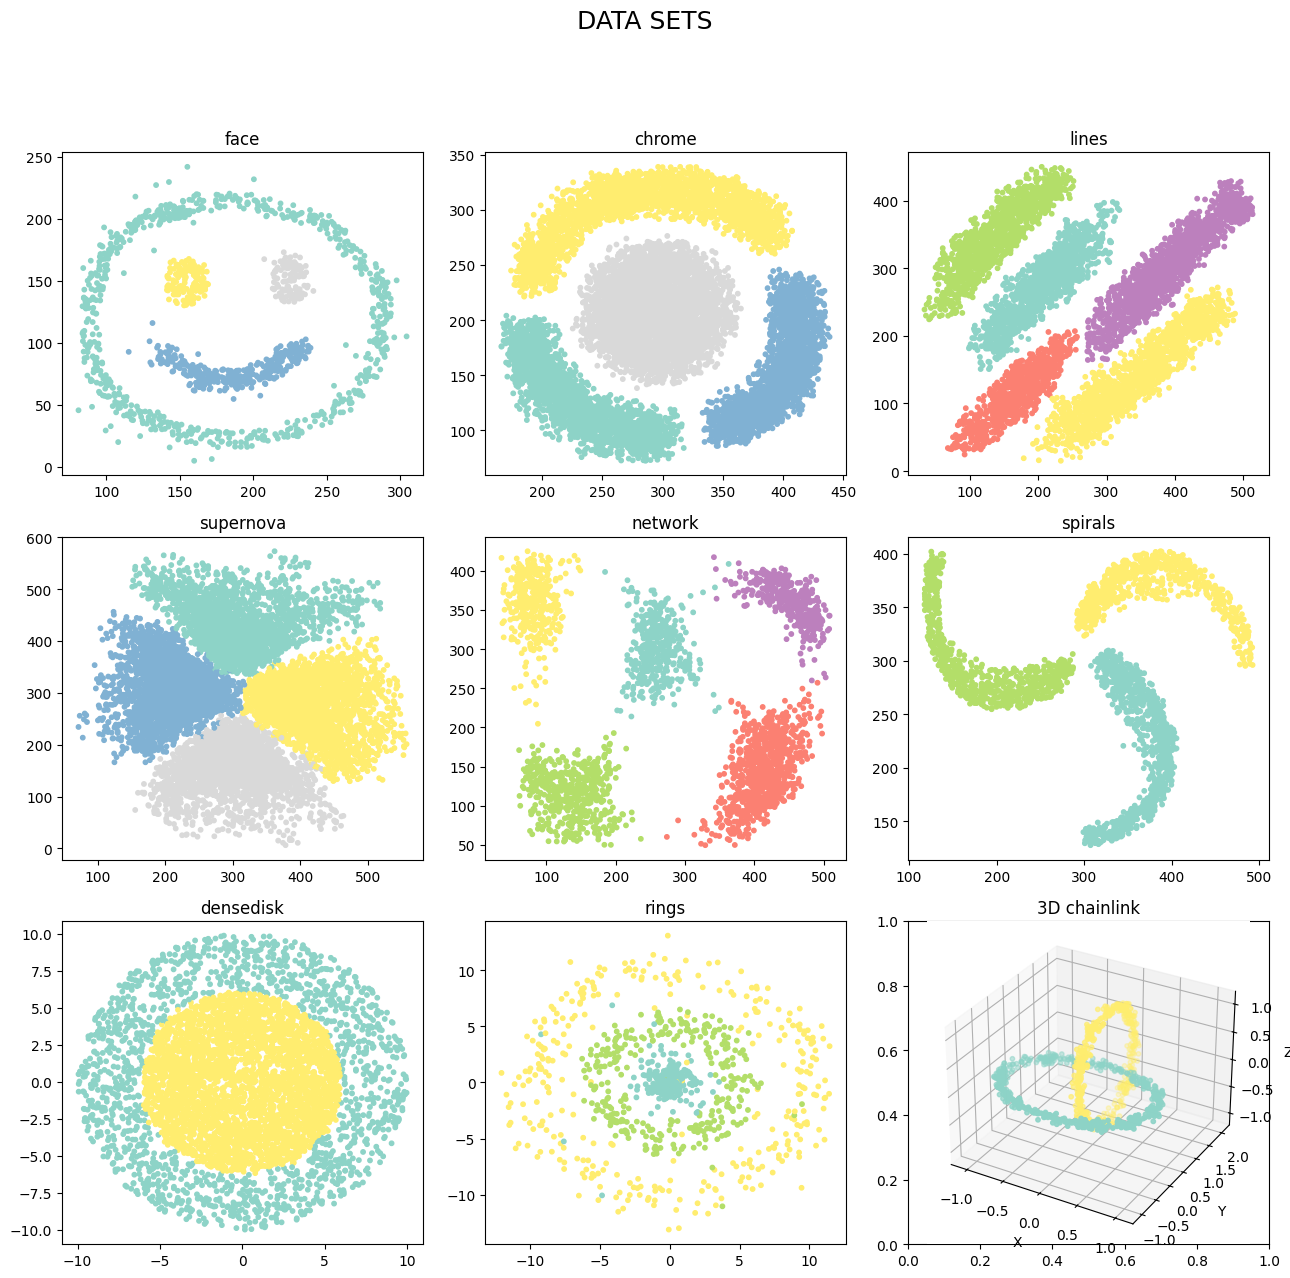

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")

axes[0, 1].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[0, 1].set_title("chrome")

axes[0, 2].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[0, 2].set_title("lines")

axes[1, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("supernova")

axes[1, 1].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[1, 1].set_title("network")

axes[1, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[1, 2].set_title("spirals")

axes[2, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3") # Use densedisk_df instead of densedisk
axes[2, 0].set_title("densedisk")

axes[2, 1].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[2, 1].set_title("rings")

# Add a 3D plot
ax3d = fig.add_subplot(3, 3, 9, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

## A. Use K-means to cluster each dataset

1. Create each copy of the dataset for k-means

In [39]:
face_kmeans = face_df.copy()
chrome_kmeans = chrome_df.copy()
lines2_kmeans = lines2_df.copy()
supernova_kmeans = supernova_df.copy()
network_kmeans = network_df.copy()
spirals_kmeans = spirals_df.copy()
densedisk_kmeans = densedisk_df.copy()
rings_kmeans = rings_df.copy()
chainlink_kmeans = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [244]:
for df in [face_kmeans, chrome_kmeans, lines2_kmeans, supernova_kmeans, network_kmeans, spirals_kmeans, densedisk_kmeans, rings_kmeans, chainlink_kmeans]:
    if 'color' in df.columns:  # Check if 'color' column exists
        df.drop(['color'], axis=1, inplace=True)

3. Train a K-means model for each dataset.

In [246]:
# Training model
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans_face = kmeans.fit_predict(face_kmeans)

kmeans_blob = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans_chrome = kmeans_blob.fit_predict(chrome_kmeans)

kmeans_lines2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans_lines2 = kmeans_lines2.fit_predict(lines2_kmeans)

kmeans_supernova = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans_supernova = kmeans_supernova.fit_predict(supernova_kmeans)

kmeans_outliers = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_network = kmeans_outliers.fit_predict(network_kmeans)

kmeans_spiral2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans_spirals = kmeans_spiral2.fit_predict(spirals_kmeans)

kmeans_boxes3 = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
y_kmeans_densedisk = kmeans_boxes3.fit_predict(densedisk_kmeans)

# Add predictions for rings and chainlink
y_kmeans_rings = kmeans.fit_predict(rings_kmeans)
y_kmeans_chainlink = kmeans.fit_predict(chainlink_kmeans)

4. Add a "Cluster" column for each data set

In [247]:
face_kmeans['Cluster'] = y_kmeans_face
chrome_kmeans['Cluster'] = y_kmeans_chrome
lines2_kmeans['Cluster'] = y_kmeans_lines2
supernova_kmeans['Cluster'] = y_kmeans_supernova
network_kmeans['Cluster'] = y_kmeans_network
spirals_kmeans['Cluster'] = y_kmeans_spirals
densedisk_kmeans['Cluster'] = y_kmeans_densedisk
rings_kmeans['Cluster'] = y_kmeans_rings
chainlink_kmeans['Cluster'] = y_kmeans_chainlink

5. Plot the Correct cluster and the K-means cluster

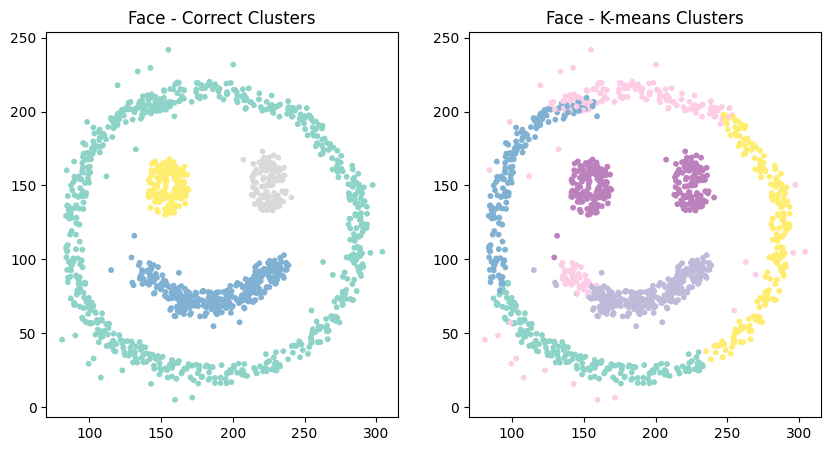

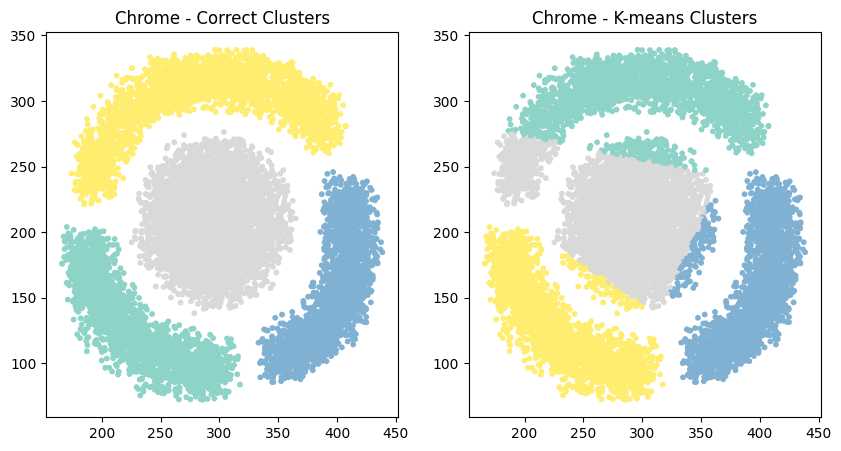

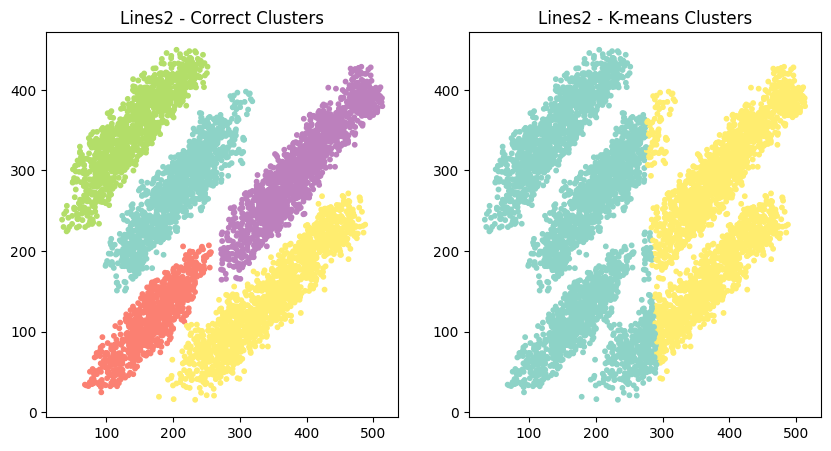

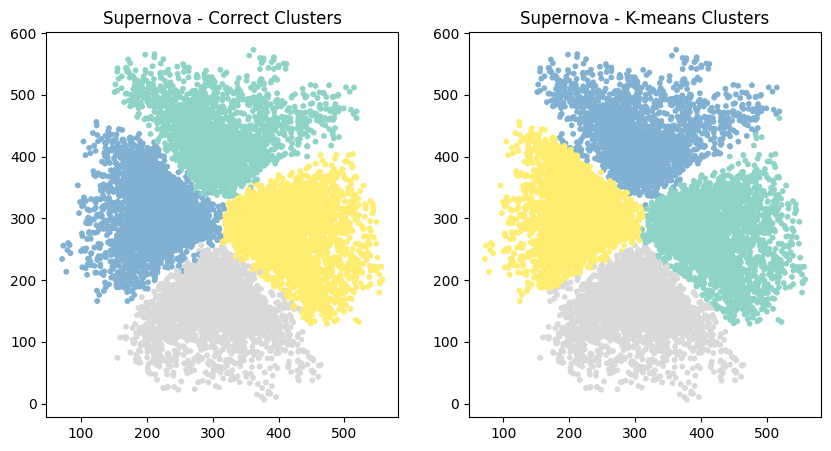

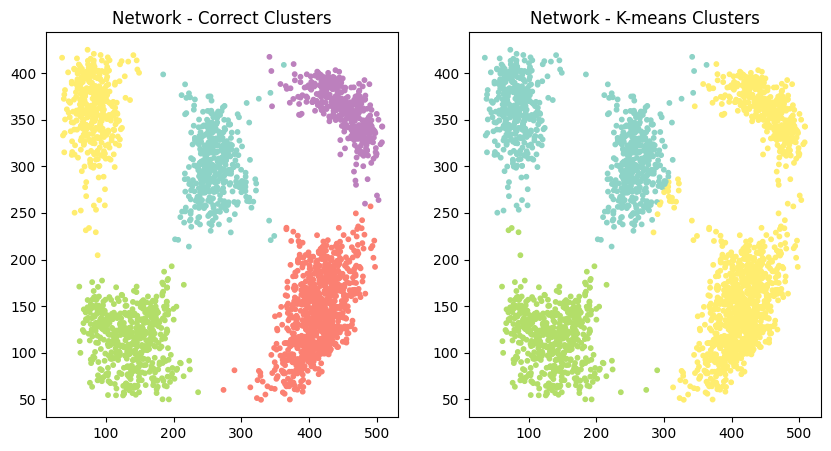

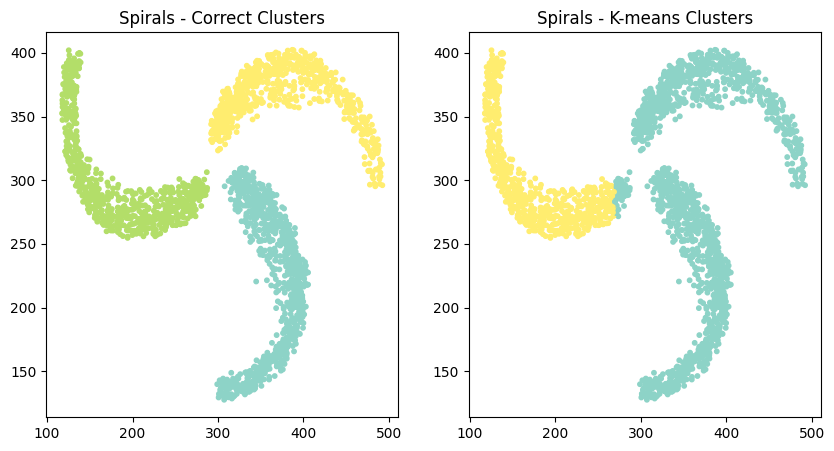

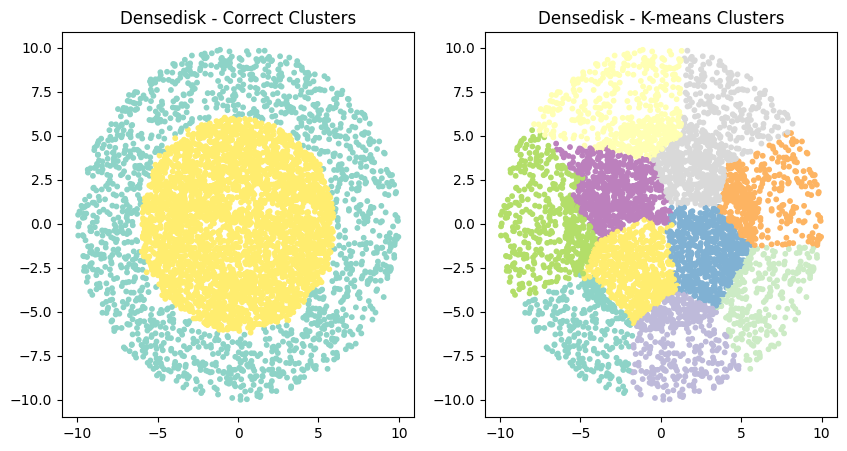

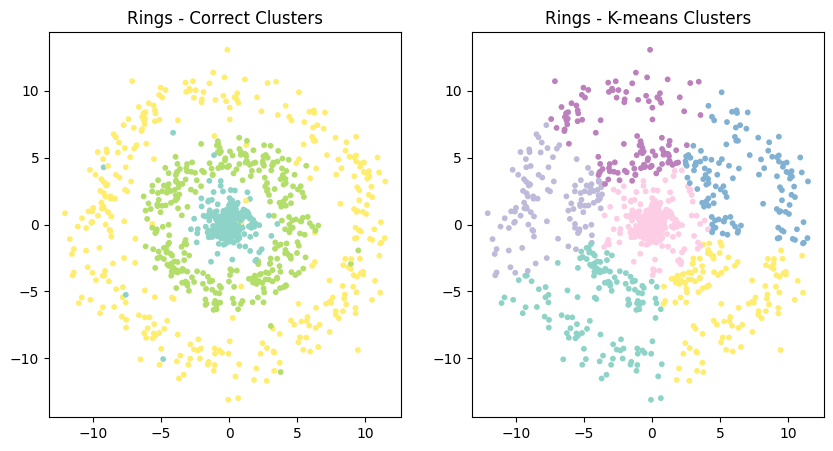

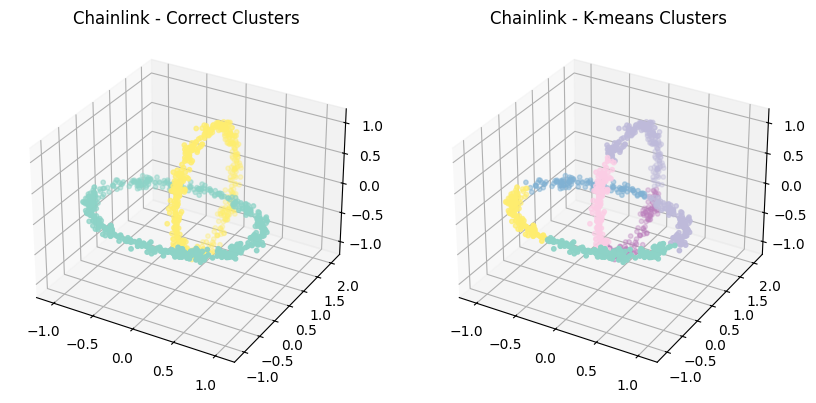

In [248]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot 2D clusters
def plot_2d_clusters(df, kmeans_df, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Correct clusters
    ax1.scatter(df['x'], df['y'], c=df['color'], s=10, cmap="Set3")
    ax1.set_title(f"{title} - Correct Clusters")

    # K-means clusters
    ax2.scatter(kmeans_df['x'], kmeans_df['y'], c=kmeans_df['Cluster'], s=10, cmap="Set3")
    ax2.set_title(f"{title} - K-means Clusters")

    plt.show()

# Function to plot 3D clusters
def plot_3d_clusters(df, kmeans_df, title):
    fig = plt.figure(figsize=(10, 5))

    # Correct clusters
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(df['x'], df['y'], df['z'], c=df['color'], cmap="Set3", s=10)
    ax1.set_title(f"{title} - Correct Clusters")

    # K-means clusters
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(kmeans_df['x'], kmeans_df['y'], kmeans_df['z'], c=kmeans_df['Cluster'], cmap="Set3", s=10)
    ax2.set_title(f"{title} - K-means Clusters")

    plt.show()

# Plot for each dataset
plot_2d_clusters(face_df, face_kmeans, "Face")
plot_2d_clusters(chrome_df, chrome_kmeans, "Chrome")
plot_2d_clusters(lines2_df, lines2_kmeans, "Lines2")
plot_2d_clusters(supernova_df, supernova_kmeans, "Supernova")
plot_2d_clusters(network_df, network_kmeans, "Network")
plot_2d_clusters(spirals_df, spirals_kmeans, "Spirals")
plot_2d_clusters(densedisk_df, densedisk_kmeans, "Densedisk")
plot_2d_clusters(rings_df, rings_kmeans, "Rings")
plot_3d_clusters(chainlink_df, chainlink_kmeans, "Chainlink")

## B. Use Agglomerative Clustering to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [249]:
df_AgglomerativeC = face_df.copy()
face_AgglomerativeC = face_df.copy()
chrome_AgglomerativeC = chrome_df.copy()
lines2_AgglomerativeC = lines2_df.copy()
supernova_AgglomerativeC = supernova_df.copy()
network_AgglomerativeC = network_df.copy()
spirals_AgglomerativeC = spirals_df.copy()
densedisk_AgglomerativeC = densedisk_df.copy()
rings_AgglomerativeC = rings_df.copy()
chainlink_AgglomerativeC = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [250]:
if 'color' in chrome_AgglomerativeC.columns:
    chrome_AgglomerativeC.drop(['color'], axis=1, inplace=True)

if 'color' in lines2_AgglomerativeC.columns:
    lines2_AgglomerativeC.drop(['color'], axis=1, inplace=True)

if 'color' in supernova_AgglomerativeC.columns:
    supernova_AgglomerativeC.drop(['color'], axis=1, inplace=True)

if 'color' in network_AgglomerativeC.columns:
    network_AgglomerativeC.drop(['color'], axis=1, inplace=True)

if 'color' in spirals_AgglomerativeC.columns:
    spirals_AgglomerativeC.drop(['color'], axis=1, inplace=True)

if 'color' in densedisk_AgglomerativeC.columns:
    densedisk_AgglomerativeC.drop(['color'], axis=1, inplace=True)

if 'color' in rings_AgglomerativeC.columns:
    rings_AgglomerativeC.drop(['color'], axis=1, inplace=True)

if 'color' in chainlink_AgglomerativeC.columns:
    chainlink_AgglomerativeC.drop(['color'], axis=1, inplace=True)

3. Train a Agglomerative Clustering model for each dataset.

In [251]:
from sklearn.cluster import AgglomerativeClustering

# Training model
AgglomerativeC = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage = 'ward')
y_AgglomerativeC = AgglomerativeC.fit_predict(df_AgglomerativeC)

AgglomerativeC_blob = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
AgglomerativeC_dart = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage = 'ward')
AgglomerativeC_basic = AgglomerativeClustering(n_clusters = 5, metric='euclidean', linkage = 'ward')
AgglomerativeC_outliers = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage = 'ward')
AgglomerativeC_spiral2 = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage = 'ward')
AgglomerativeC_boxes3 = AgglomerativeClustering(n_clusters = 12, metric='euclidean', linkage = 'ward')
AgglomerativeC_rings = AgglomerativeClustering(n_clusters = 6, metric='euclidean', linkage = 'ward')
AgglomerativeC_chainlink = AgglomerativeClustering(n_clusters = 6, metric='euclidean', linkage = 'ward')

y_AgglomerativeC_blob = AgglomerativeC_blob.fit_predict(df_blob_AgglomerativeC)
y_AgglomerativeC_dart = AgglomerativeC_dart.fit_predict(df_dart_AgglomerativeC)
y_AgglomerativeC_basic = AgglomerativeC_basic.fit_predict(df_basic2_AgglomerativeC)
y_AgglomerativeC_outliers = AgglomerativeC_outliers.fit_predict(df_outliers_AgglomerativeC)
y_AgglomerativeC_spiral2 = AgglomerativeC_spiral2.fit_predict(df_spiral2_AgglomerativeC)
y_AgglomerativeC_boxes3 = AgglomerativeC_boxes3.fit_predict(df_boxes3_AgglomerativeC)
y_AgglomerativeC_rings = AgglomerativeC.fit_predict(rings_AgglomerativeC)
y_AgglomerativeC_chainlink = AgglomerativeC.fit_predict(chainlink_AgglomerativeC)

df_AgglomerativeC['Cluster'] = y_AgglomerativeC
rings_AgglomerativeC['Cluster'] = y_AgglomerativeC_rings
chainlink_AgglomerativeC['Cluster'] = y_AgglomerativeC_chainlink

4. Add a "Cluster" column for each data set

In [252]:
df_blob_AgglomerativeC['Cluster'] = y_AgglomerativeC_blob
df_dart_AgglomerativeC['Cluster'] = y_AgglomerativeC_dart
df_basic2_AgglomerativeC['Cluster'] = y_AgglomerativeC_basic
df_outliers_AgglomerativeC['Cluster'] = y_AgglomerativeC_outliers
df_spiral2_AgglomerativeC['Cluster'] = y_AgglomerativeC_spiral2
df_boxes3_AgglomerativeC['Cluster'] = y_AgglomerativeC_boxes3

rings_AgglomerativeC = rings_df.copy()
chainlink_AgglomerativeC = chainlink_df.copy()

5. Plot the Correct cluster and the Agglomerative cluster

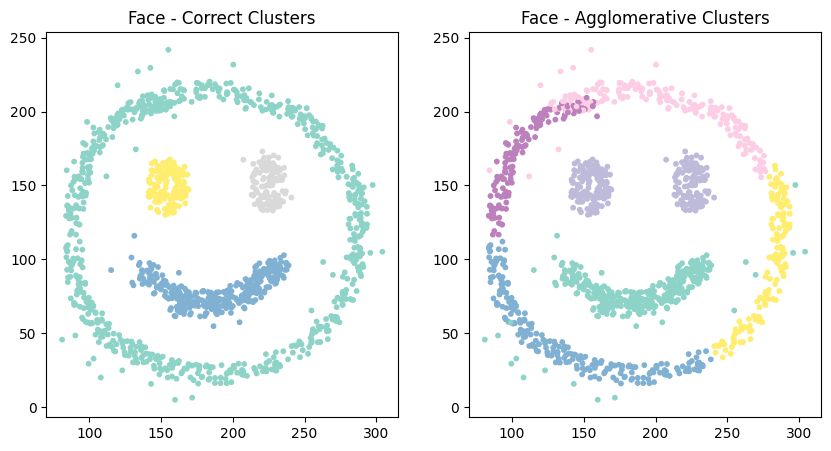

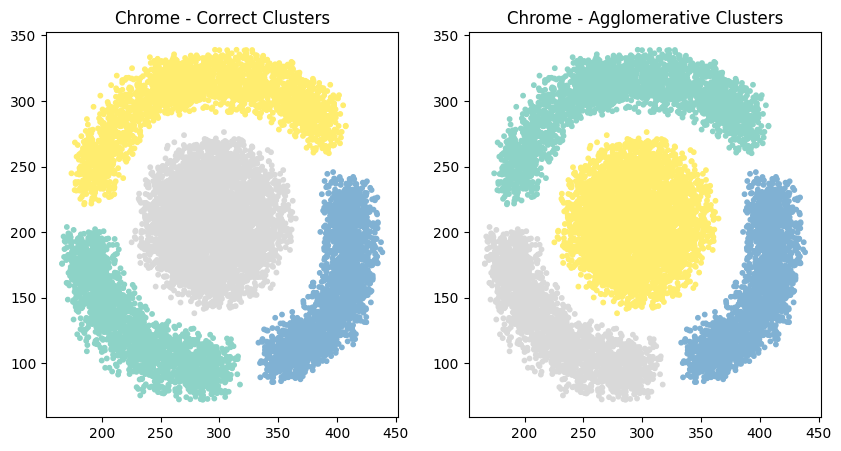

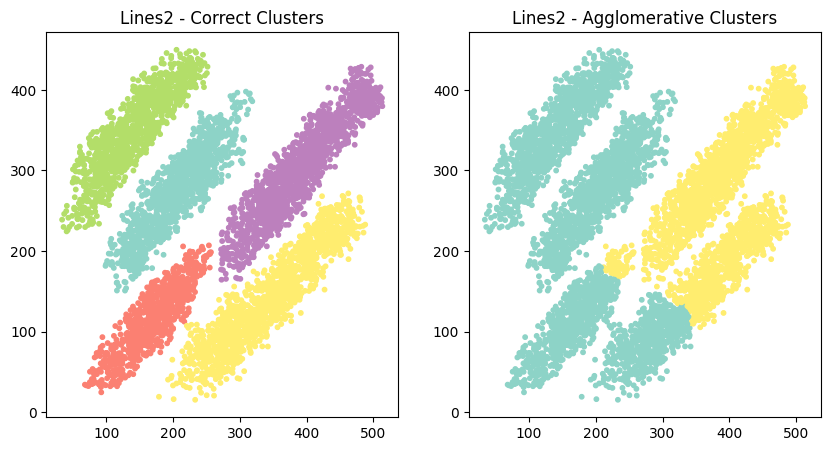

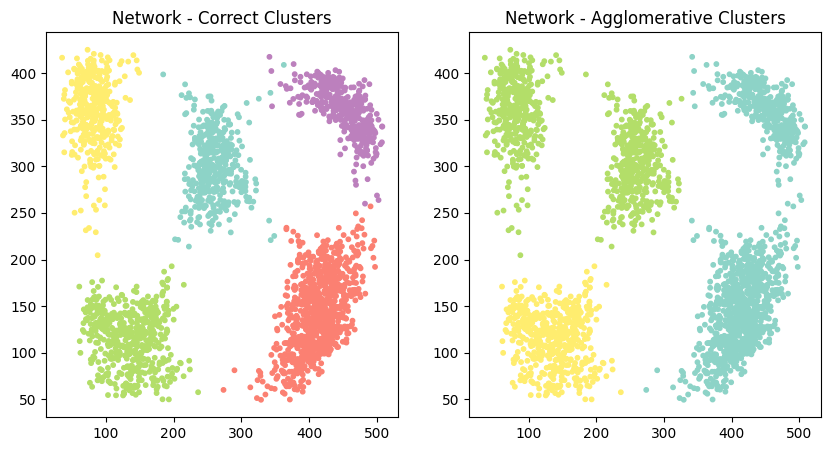

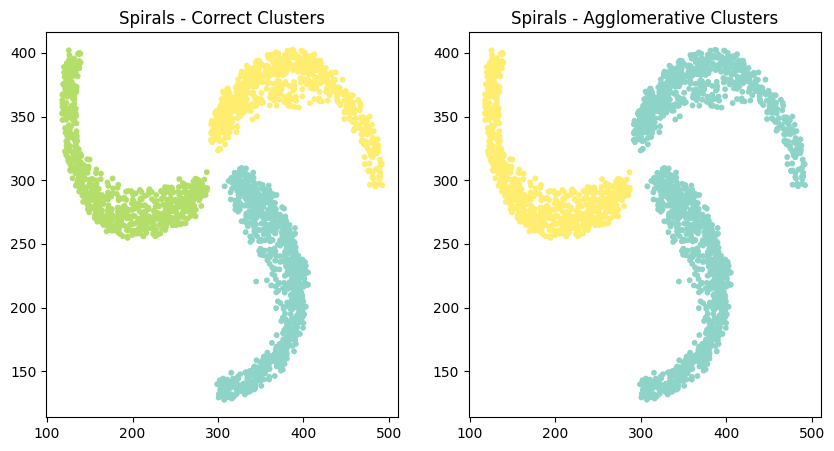

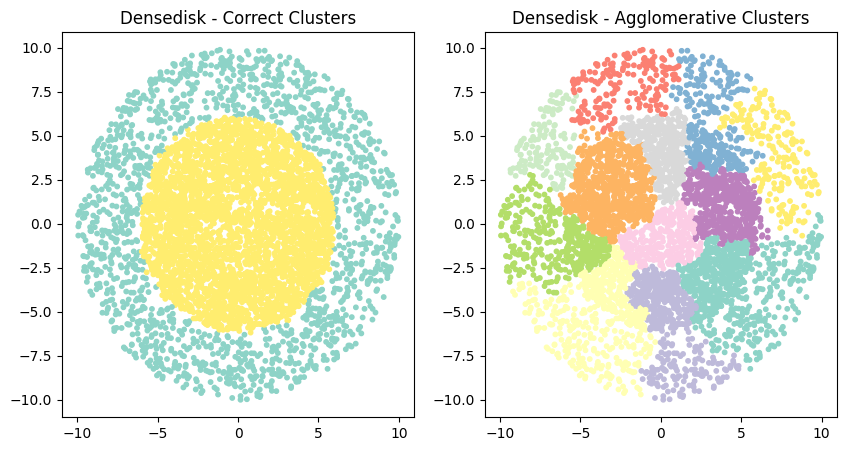

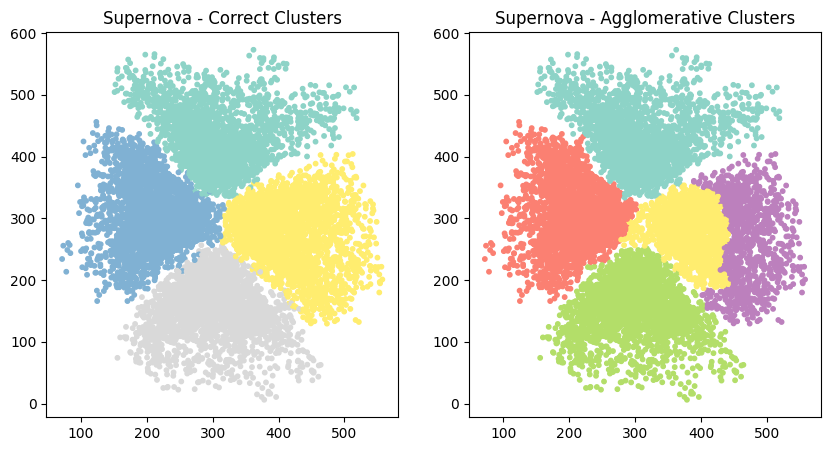

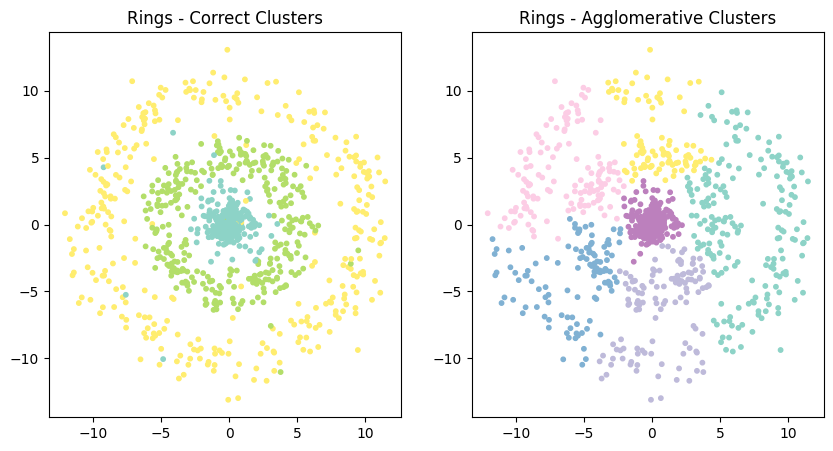

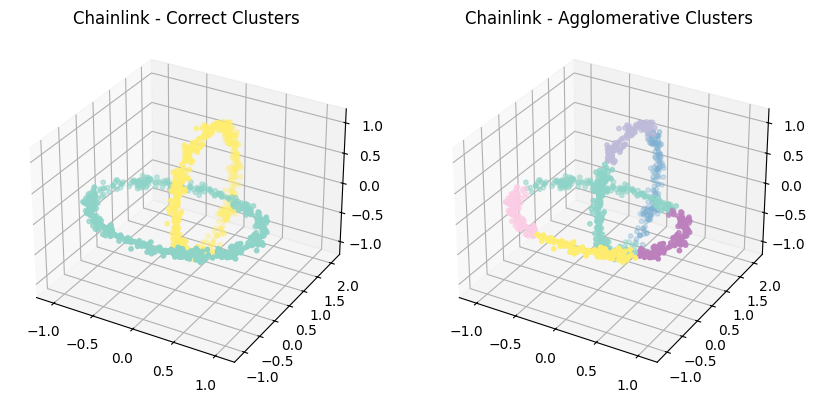

In [253]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def plot_2d_clusters(df, agg_df, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


    ax1.scatter(df['x'], df['y'], c=df['color'], s=10, cmap="Set3")
    ax1.set_title(f"{title} - Correct Clusters")


    ax2.scatter(agg_df['x'], agg_df['y'], c=agg_df['Cluster'], s=10, cmap="Set3")
    ax2.set_title(f"{title} - Agglomerative Clusters")

    plt.show()


def plot_3d_clusters(df, agg_df, title):
    fig = plt.figure(figsize=(10, 5))


    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(df['x'], df['y'], df['z'], c=df['color'], cmap="Set3", s=10)
    ax1.set_title(f"{title} - Correct Clusters")


    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(agg_df['x'], agg_df['y'], agg_df['z'], c=agg_df['Cluster'], cmap="Set3", s=10)
    ax2.set_title(f"{title} - Agglomerative Clusters")

    plt.show()

rings_AgglomerativeC['Cluster'] = y_AgglomerativeC_rings
chainlink_AgglomerativeC['Cluster'] = y_AgglomerativeC_chainlink


plot_2d_clusters(face_df, df_AgglomerativeC, "Face")
plot_2d_clusters(chrome_df, df_blob_AgglomerativeC, "Chrome")
plot_2d_clusters(lines2_df, df_dart_AgglomerativeC, "Lines2")
y_AgglomerativeC_basic = AgglomerativeC_basic.fit_predict(supernova_AgglomerativeC)
supernova_AgglomerativeC['Cluster'] = y_AgglomerativeC_basic
plot_2d_clusters(network_df, df_outliers_AgglomerativeC, "Network")
plot_2d_clusters(spirals_df, df_spiral2_AgglomerativeC, "Spirals")
plot_2d_clusters(densedisk_df, df_boxes3_AgglomerativeC, "Densedisk")


plot_2d_clusters(supernova_df, supernova_AgglomerativeC, "Supernova")
plot_2d_clusters(rings_df, rings_AgglomerativeC, "Rings")
plot_3d_clusters(chainlink_df, chainlink_AgglomerativeC, "Chainlink")


## C. Use DBSCAN to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [254]:
df_DBScan = face_df.copy()
df_blob_DBScan = chrome_df.copy()
df_dart_DBScan = lines2_df.copy()
df_basic2_DBScan = supernova_df.copy()
df_outliers_DBScan = network_df.copy()
df_spiral2_DBScan = spirals_df.copy()
df_boxes3_DBScan = densedisk_df.copy()
df_rings_DBScan = rings_df.copy()
df_chainlink_DBScan = chainlink_df.copy()

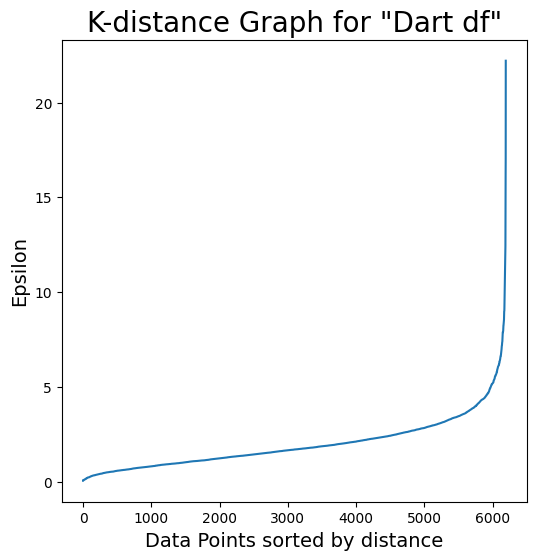

In [255]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=4)
nbrs = nn.fit(df_dart_DBScan)
distances, indices = nbrs.kneighbors(df_dart_DBScan)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(6,6))
plt.plot(distances)
plt.title('K-distance Graph for "Dart df"',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

2. Drop the "color" column on all datasets

In [256]:
df_blob_DBScan.drop(['color'], axis = 1, inplace =True)
df_dart_DBScan.drop(['color'], axis = 1, inplace =True)
df_basic2_DBScan.drop(['color'], axis = 1, inplace =True)
df_outliers_DBScan.drop(['color'], axis = 1, inplace =True)
df_spiral2_DBScan.drop(['color'], axis = 1, inplace =True)
df_boxes3_DBScan.drop(['color'], axis = 1, inplace =True)
df_rings_DBScan.drop(['color'], axis = 1, inplace =True)
df_chainlink_DBScan.drop(['color'], axis = 1, inplace =True)

3. Train a DBSCAN Clustering model for each dataset.

In [293]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=15, min_samples=10, metric='euclidean')
y_DBScan = dbscan.fit_predict(df_DBScan)

DBScan_blob = DBSCAN(eps=13, min_samples=4, metric='euclidean')
DBScan_dart = DBSCAN(eps=8, min_samples=4, metric='euclidean')
DBScan_basic = DBSCAN(eps=15, min_samples=4, metric='euclidean')
DBScan_outliers = DBSCAN(eps=20, min_samples=4, metric='euclidean')
DBScan_spiral2 = DBSCAN(eps=5.7, min_samples=4, metric='euclidean')
DBScan_boxes3 = DBSCAN(eps=6, min_samples=4, metric='euclidean')
DBScan_rings = DBSCAN(eps=20, min_samples=4, metric='euclidean')
DBScan_chainlink = DBSCAN(eps=20, min_samples=4, metric='euclidean')

y_DBScan_blob = DBScan_blob.fit_predict(df_blob_DBScan)
y_DBScan_dart = DBScan_dart.fit_predict(df_dart_DBScan)
y_DBScan_basic = DBScan_basic.fit_predict(df_basic2_DBScan)
y_DBScan_outliers = DBScan_outliers.fit_predict(df_outliers_DBScan)
y_DBScan_spiral2 = DBScan_spiral2.fit_predict(df_spiral2_DBScan)
y_DBScan_boxes3 = DBScan_boxes3.fit_predict(df_boxes3_DBScan)
y_DBScan_rings = DBScan_rings.fit_predict(df_rings_DBScan)
y_DBScan_chainlink = DBScan_chainlink.fit_predict(df_chainlink_DBScan)

4. Add a "Cluster" column for each data set

In [294]:
df_blob_DBScan['Cluster'] = y_DBScan_blob
df_dart_DBScan['Cluster'] = y_DBScan_dart
df_basic2_DBScan['Cluster'] = y_DBScan_basic
df_outliers_DBScan['Cluster'] = y_DBScan_outliers
df_spiral2_DBScan['Cluster'] = y_DBScan_spiral2
df_boxes3_DBScan['Cluster'] = y_DBScan_boxes3
df_rings_DBScan['Cluster'] = y_DBScan_rings
df_chainlink_DBScan['Cluster'] = y_DBScan_chainlink

5. Plot the Correct cluster and the DBSCAN cluster

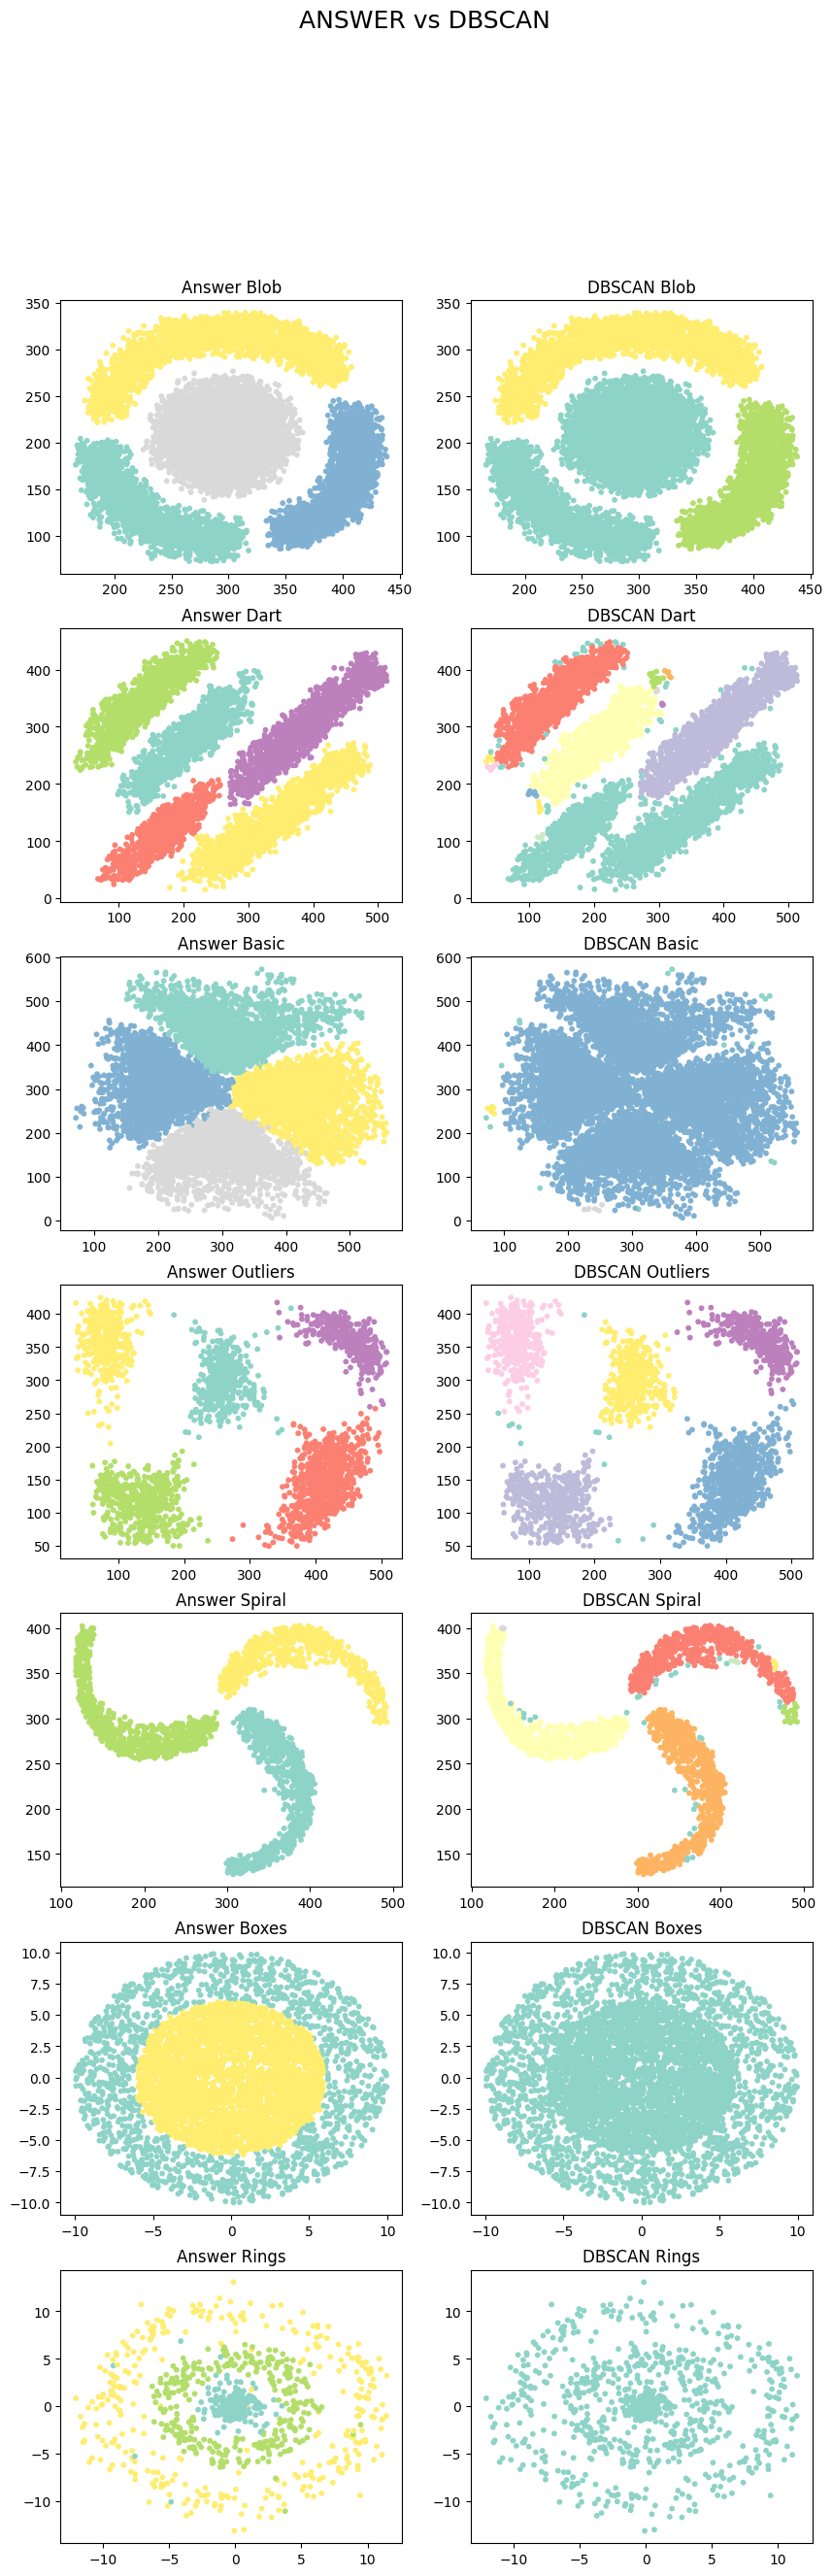

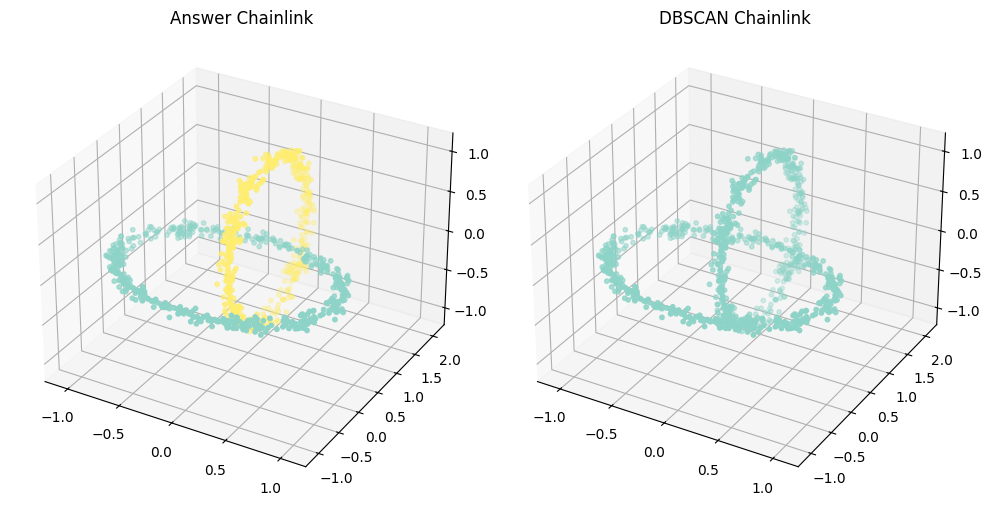

In [295]:
fig, axes = plt.subplots(nrows=7, ncols=2,figsize=(10,30)) # Increased nrows to 8 to accommodate all plots
fig.suptitle('ANSWER vs DBSCAN\n', size = 18)

axes[0,0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Blob");
axes[0,1].scatter(df_blob_DBScan['x'], df_blob_DBScan['y'], c=df_blob_DBScan['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("DBSCAN Blob");

axes[1,0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Dart");
axes[1,1].scatter(df_dart_DBScan['x'], df_dart_DBScan['y'], c=df_dart_DBScan['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("DBSCAN Dart");

axes[2,0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer Basic");
axes[2,1].scatter(df_basic2_DBScan['x'], df_basic2_DBScan['y'], c=df_basic2_DBScan['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("DBSCAN Basic");

axes[3,0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer Outliers");
axes[3,1].scatter(df_outliers_DBScan['x'], df_outliers_DBScan['y'], c=df_outliers_DBScan['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("DBSCAN Outliers");

axes[4,0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer Spiral");
axes[4,1].scatter(df_spiral2_DBScan['x'], df_spiral2_DBScan['y'], c=df_spiral2_DBScan['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("DBSCAN Spiral");

axes[5,0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer Boxes");
axes[5,1].scatter(df_boxes3_DBScan['x'], df_boxes3_DBScan['y'], c=df_boxes3_DBScan['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("DBSCAN Boxes");

axes[6, 0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")  # Remove zs and zdir
axes[6, 1].scatter(df_rings_DBScan['x'], df_rings_DBScan['y'], c=df_rings_DBScan['Cluster'], s=10, cmap="Set3")  # Remove zs and zdir # zs=0 for constant z
axes[6, 0].set_title("Answer Rings");
axes[6, 1].set_title("DBSCAN Rings");

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig_3d, ax_3d = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(10, 5))

ax_3d[0].scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], s=10, c=chainlink_df['color'], cmap="Set3")
ax_3d[0].set_title("Answer Chainlink")

ax_3d[1].scatter(df_chainlink_DBScan['x'], df_chainlink_DBScan['y'], df_chainlink_DBScan['z'], s=10, c=df_chainlink_DBScan['Cluster'], cmap="Set3")
ax_3d[1].set_title("DBSCAN Chainlink")

plt.tight_layout()
plt.show()



## D. Compare all algorithms

1. Display the Correct cluster, K-means cluster, Agglomerative cluster and DBSCAN cluster in a single plot.

- Each row should contain each dataset
- Each column should contain each the correct cluster, k-means cluster, agglomerative cluster and DBSCAN cluster.

<ipython-input-296-befaf382de56>:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i, 3].scatter(dbscan_df['x'], dbscan_df['y'], s=10, cmap="Set3")


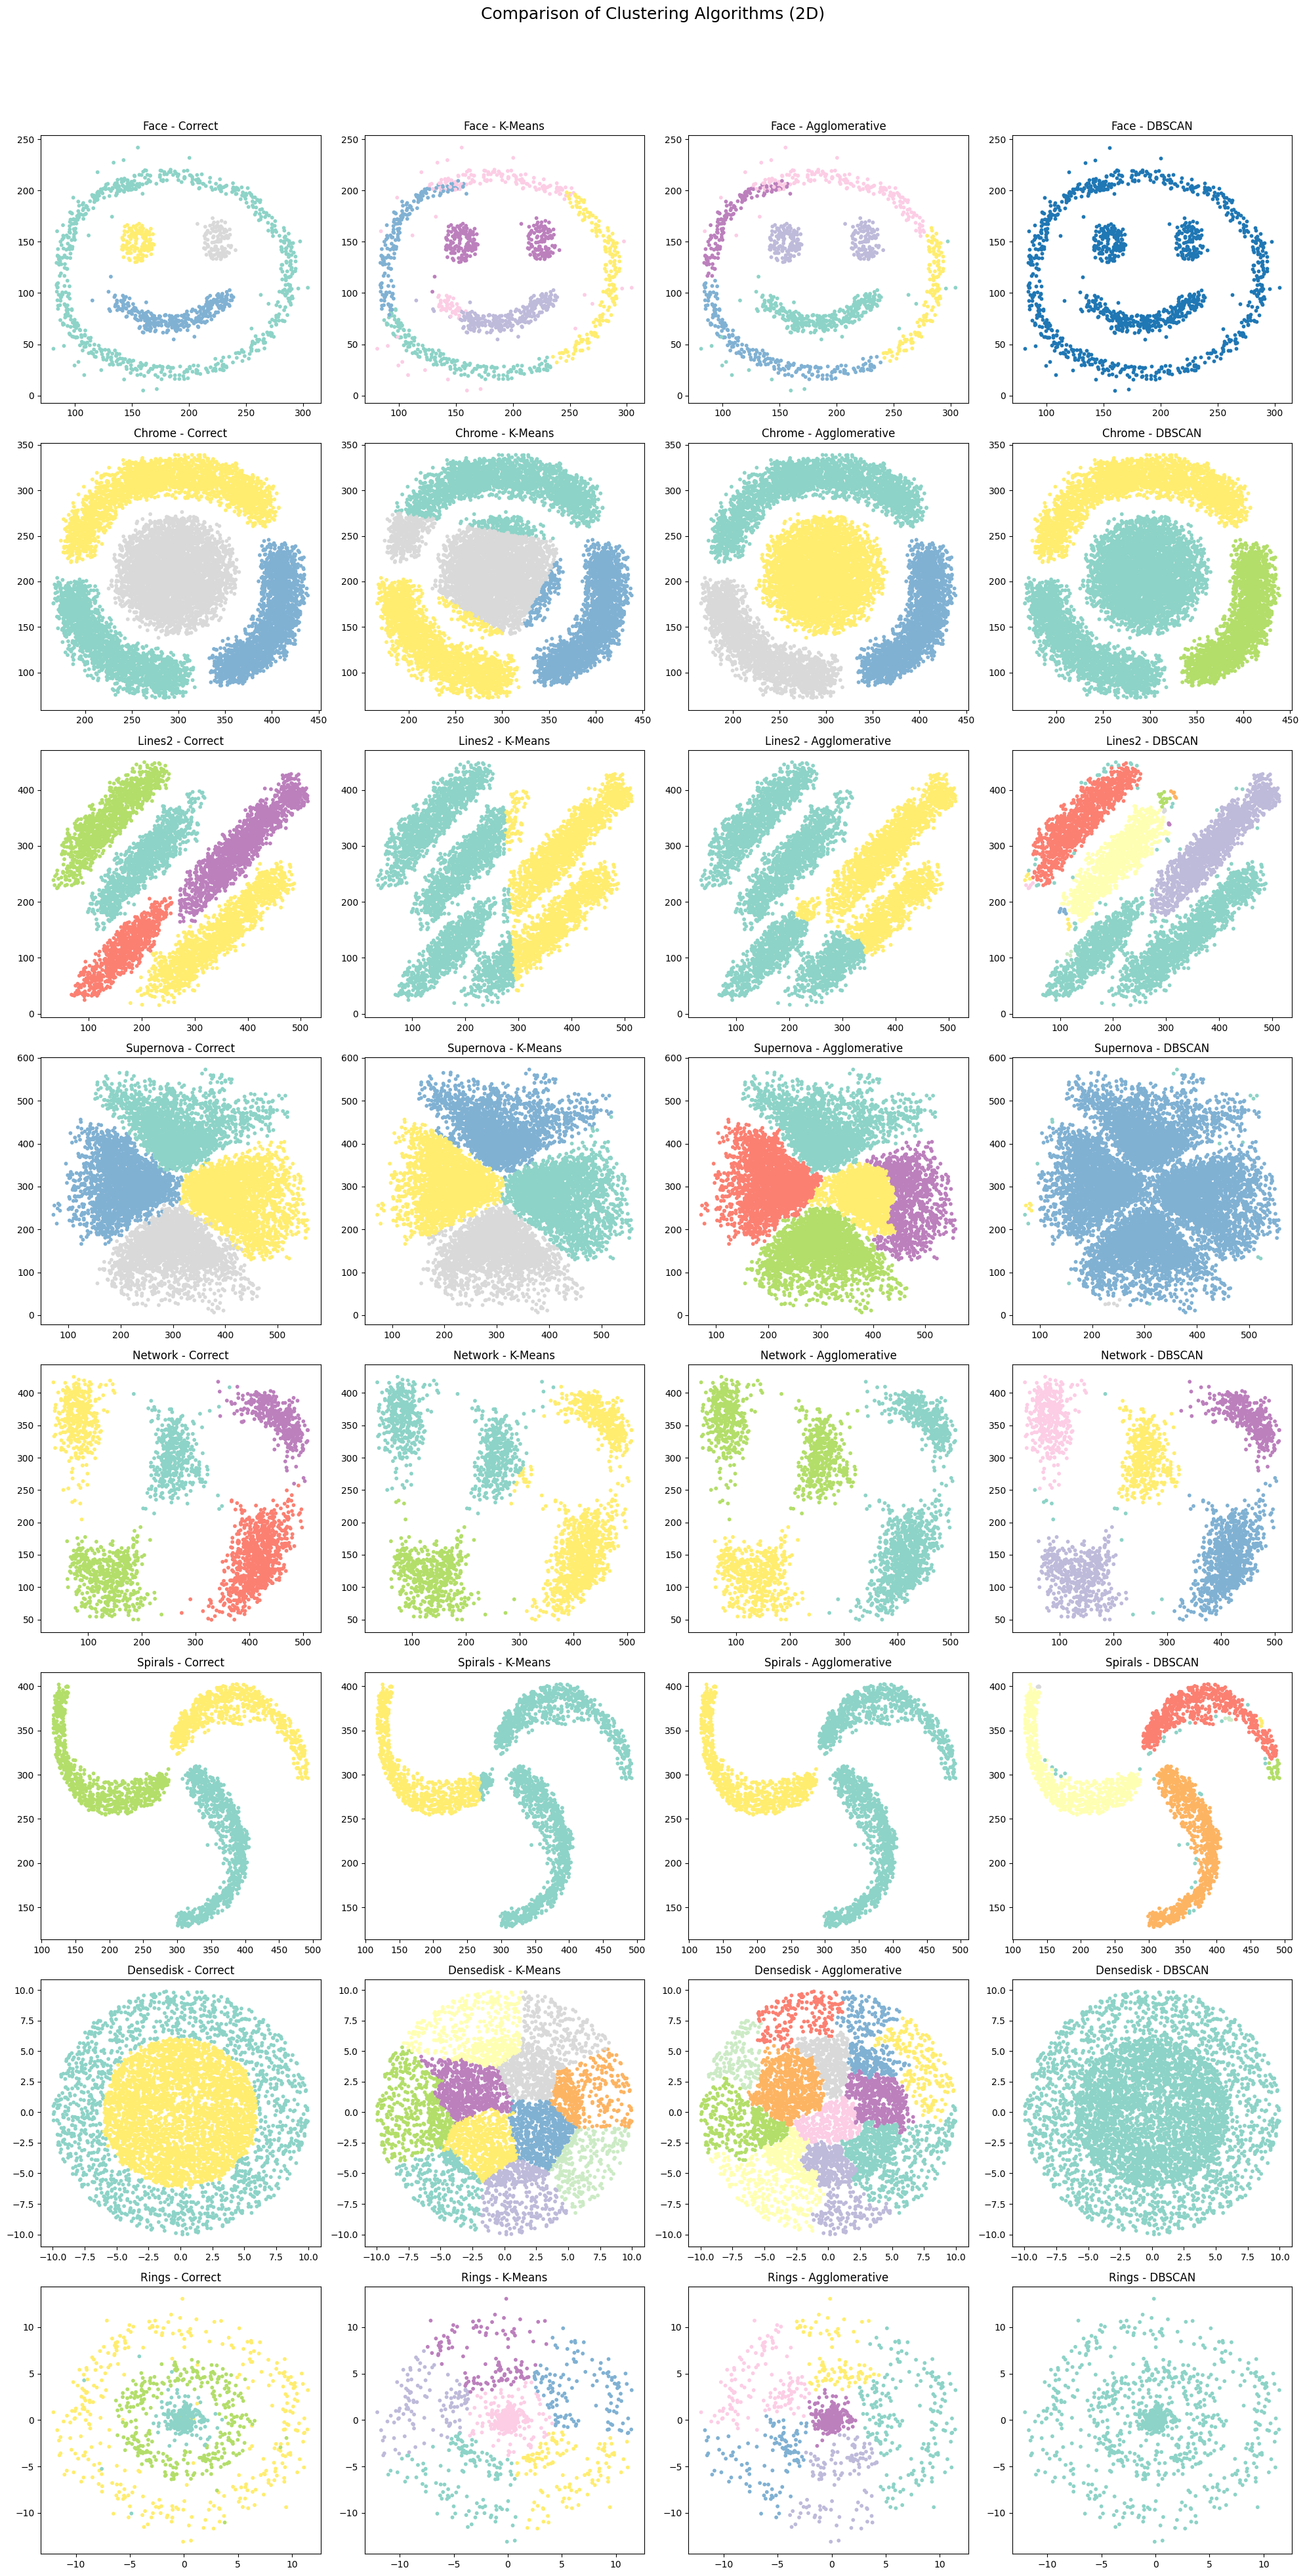

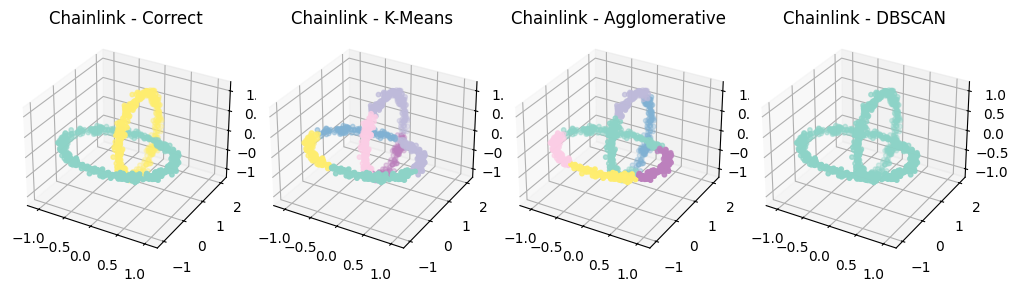

In [296]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define datasets and corresponding dataframes
datasets = [
    ("Face", face_df, face_kmeans, df_AgglomerativeC, df_DBScan),
    ("Chrome", chrome_df, chrome_kmeans, df_blob_AgglomerativeC, df_blob_DBScan),
    ("Lines2", lines2_df, lines2_kmeans, df_dart_AgglomerativeC, df_dart_DBScan),
    ("Supernova", supernova_df, supernova_kmeans, supernova_AgglomerativeC, df_basic2_DBScan),
    ("Network", network_df, network_kmeans, df_outliers_AgglomerativeC, df_outliers_DBScan),
    ("Spirals", spirals_df, spirals_kmeans, df_spiral2_AgglomerativeC, df_spiral2_DBScan),
    ("Densedisk", densedisk_df, densedisk_kmeans, df_boxes3_AgglomerativeC, df_boxes3_DBScan),
    ("Rings", rings_df, rings_kmeans, rings_AgglomerativeC, df_rings_DBScan),
    ("Chainlink", chainlink_df, chainlink_kmeans, chainlink_AgglomerativeC, df_chainlink_DBScan)
]

datasets_2d = [dataset for dataset in datasets if dataset[0] != "Chainlink"]

num_datasets_2d = len(datasets_2d)
num_cols = 4
fig, axes = plt.subplots(nrows=num_datasets_2d, ncols=num_cols, figsize=(20, 5 * num_datasets_2d))
fig.suptitle("Comparison of Clustering Algorithms (2D)", size=18)


for i, (dataset_name, original_df, kmeans_df, agg_df, dbscan_df) in enumerate(datasets_2d):

    axes[i, 0].scatter(original_df['x'], original_df['y'], c=original_df['color'], s=10, cmap="Set3")
    axes[i, 0].set_title(f"{dataset_name} - Correct")

    axes[i, 1].scatter(kmeans_df['x'], kmeans_df['y'], c=kmeans_df['Cluster'], s=10, cmap="Set3")
    axes[i, 1].set_title(f"{dataset_name} - K-Means")

    axes[i, 2].scatter(agg_df['x'], agg_df['y'], c=agg_df['Cluster'], s=10, cmap="Set3")
    axes[i, 2].set_title(f"{dataset_name} - Agglomerative")


    if 'Cluster' in dbscan_df.columns:
        axes[i, 3].scatter(dbscan_df['x'], dbscan_df['y'], c=dbscan_df['Cluster'], s=10, cmap="Set3")
    else:
        axes[i, 3].scatter(dbscan_df['x'], dbscan_df['y'], s=10, cmap="Set3")
        print(f"Warning: 'Cluster' column not found in dbscan_df for {dataset_name}. Plotting with default color.")
    axes[i, 3].set_title(f"{dataset_name} - DBSCAN")


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


fig_3d = plt.figure(figsize=(10, 5))


for _, original_df, kmeans_df, agg_df, dbscan_df in datasets:
    if _ == "Chainlink":

        ax_3d_correct = fig_3d.add_subplot(1, 4, 1, projection='3d')
        ax_3d_correct.scatter(original_df['x'], original_df['y'], original_df['z'], c=original_df['color'], s=10, cmap="Set3")
        ax_3d_correct.set_title("Chainlink - Correct")

        ax_3d_kmeans = fig_3d.add_subplot(1, 4, 2, projection='3d')
        ax_3d_kmeans.scatter(kmeans_df['x'], kmeans_df['y'], kmeans_df['z'], c=kmeans_df['Cluster'], s=10, cmap="Set3")
        ax_3d_kmeans.set_title("Chainlink - K-Means")

        ax_3d_agg = fig_3d.add_subplot(1, 4, 3, projection='3d')
        ax_3d_agg.scatter(agg_df['x'], agg_df['y'], agg_df['z'], c=agg_df['Cluster'], s=10, cmap="Set3")
        ax_3d_agg.set_title("Chainlink - Agglomerative")

        ax_3d_dbscan = fig_3d.add_subplot(1, 4, 4, projection='3d')
        ax_3d_dbscan.scatter(dbscan_df['x'], dbscan_df['y'], dbscan_df['z'], c=dbscan_df['Cluster'], s=10, cmap="Set3")
        ax_3d_dbscan.set_title("Chainlink - DBSCAN")


fig_3d.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
